<a href="https://colab.research.google.com/github/GabrielPing/DSRP_Project/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/GabrielPing/DSRP_Project/refs/heads/main/health_dataset.csv"
df = pd.read_csv(url)

code_map = {
    'Gender': [9],
    'Marital_status': [3, 9],
    'Household': [9],
    'Age': [],
    'Worked_job_business': [6, 7, 8, 9],
    'Edu_level': [9],
    'Gen_health_state': [6, 7, 8, 9],
    'Life_satisfaction': [97, 98, 99],
    'Mental_health_state': [7, 8, 9],
    'Stress_level': [7, 8],
    'Work_stress': [6, 7, 8, 9],
    'Sense_belonging': [7, 8, 9],
    'Weight_state': [6, 7, 8, 9],
    'BMI_12_17': [6, 9],
    'BMI_18_above': [6, 9],
    'Sleep_apnea': [7, 8],
    'High_BP': [7, 8],
    'High_cholestrol': [6, 7, 8],
    'Diabetic': [6, 7, 8, 9],
    'Fatigue_syndrome': [7, 8],
    'Mood_disorder': [7, 8],
    'Anxiety_disorder': [7, 8],
    'Respiratory_chronic_con': [9],
    'Musculoskeletal_con': [6, 9],
    'Cardiovascular_con': [9],
    'Health_utility_indx': [9],
    'Pain_status': [9],
    'Act_improve_health': [6, 7, 8, 9],
    'Fruit_veg_con': [],
    'Tobaco_use': [6, 7, 8, 9],
    'weekly_alcohol': [999],
    'Cannabies_use': [6, 7, 8, 9],
    'Drug_use': [3, 4, 9],
    'working_status': [6, 9],
    'Aboriginal_identity': [7, 8, 9],
    'Birth_country': [9],
    'Immigrant': [9],
    'Insurance_cover': [7, 8, 9],
    'Food_security': [6, 9],
    'Income_source': [9],
    'Total_income': [9],
}

categorical_cols = list(code_map.keys())

for col in categorical_cols:
    if col in df.columns:
        codes = code_map.get(col, [])
        if codes:
            df[col] = df[col].replace(codes, pd.NA)
        print(f"Value counts for {col}:")
        print(df[col].value_counts(dropna=True).sort_index())
        print("-" * 50)

Value counts for Gender:
Gender
1    49284
2    58968
Name: count, dtype: int64
--------------------------------------------------
Value counts for Marital_status:
Marital_status
1.0    55861
2.0    45517
Name: count, dtype: int64
--------------------------------------------------
Value counts for Household:
Household
1.0    33882
2.0    73848
Name: count, dtype: int64
--------------------------------------------------
Value counts for Age:
Age
1     6499
2    15277
3    16825
4    21684
5    47967
Name: count, dtype: int64
--------------------------------------------------
Value counts for Worked_job_business:
Worked_job_business
1.0    43694
2.0     9304
Name: count, dtype: int64
--------------------------------------------------
Value counts for Edu_level:
Edu_level
1.0     9469
2.0    16069
3.0    76845
Name: count, dtype: int64
--------------------------------------------------
Value counts for Gen_health_state:
Gen_health_state
1    21198
2    39093
3    31643
4    11732
5     44

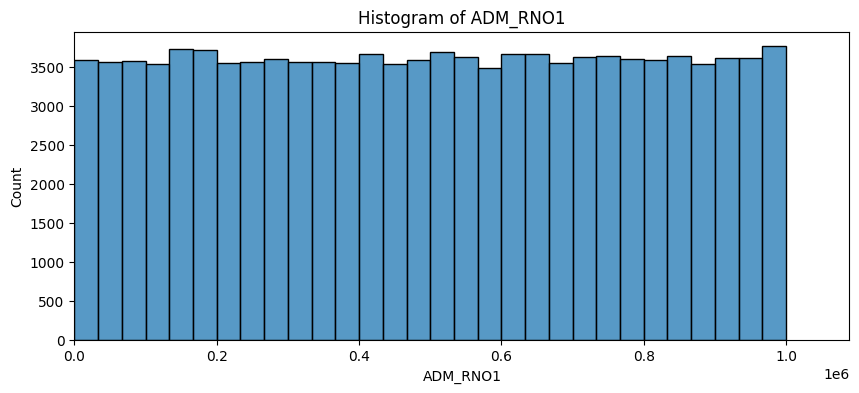

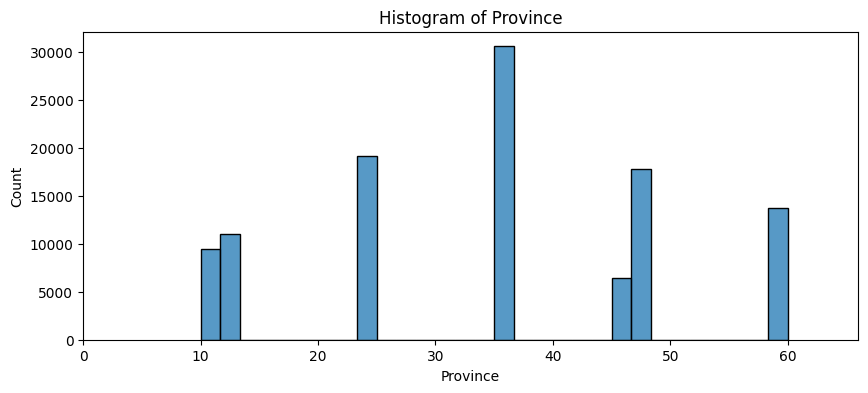

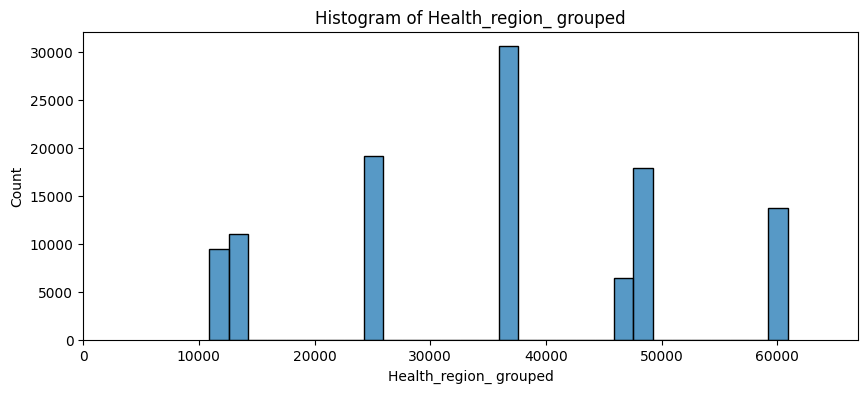

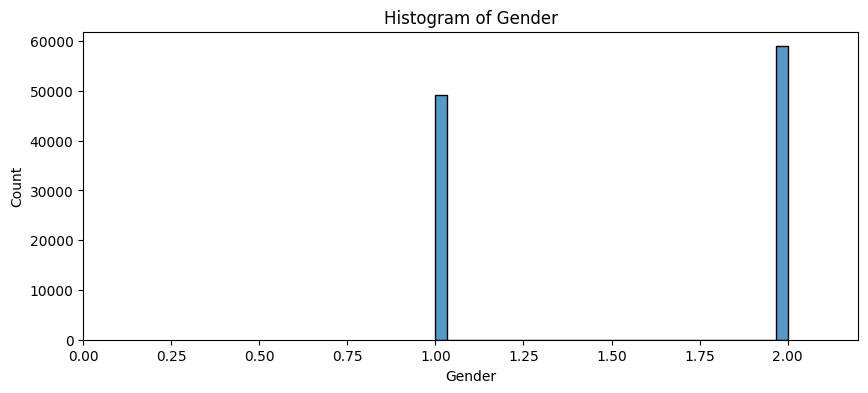

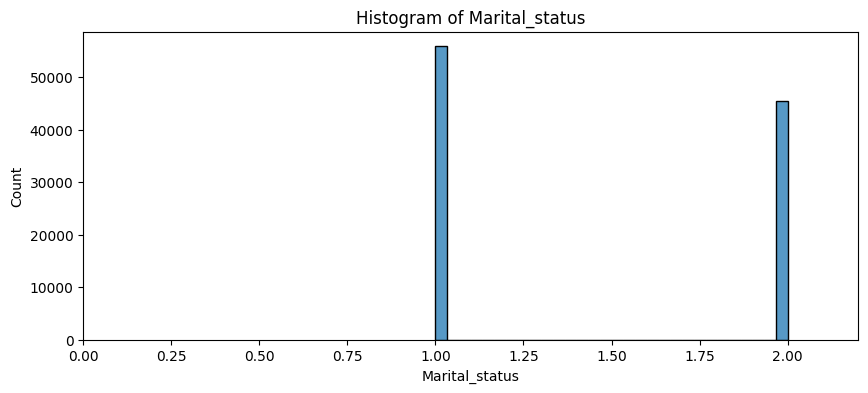

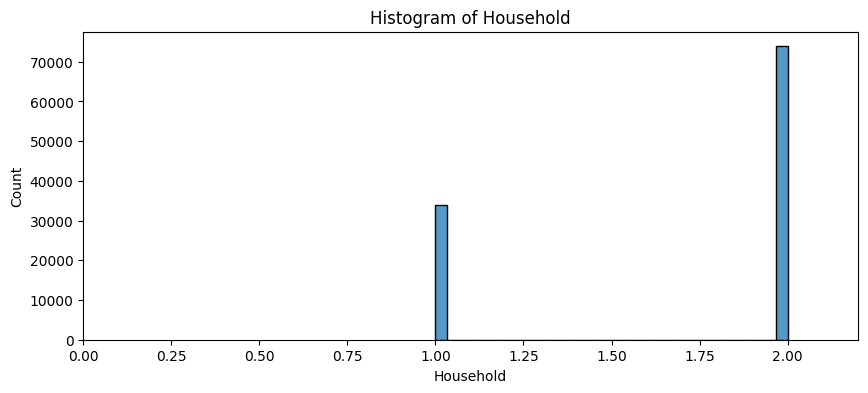

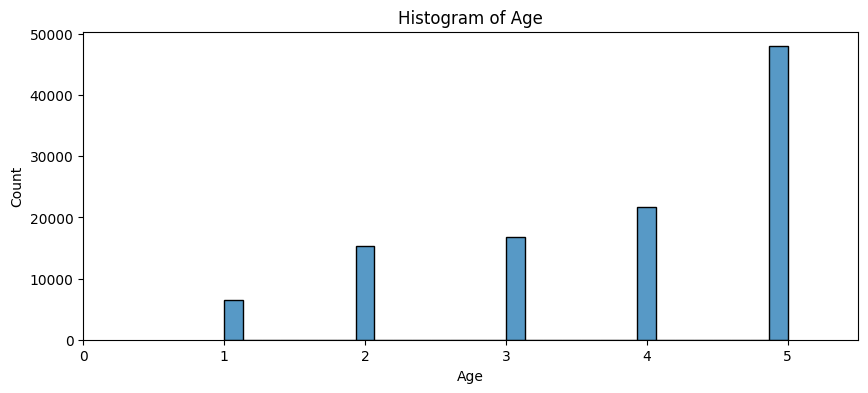

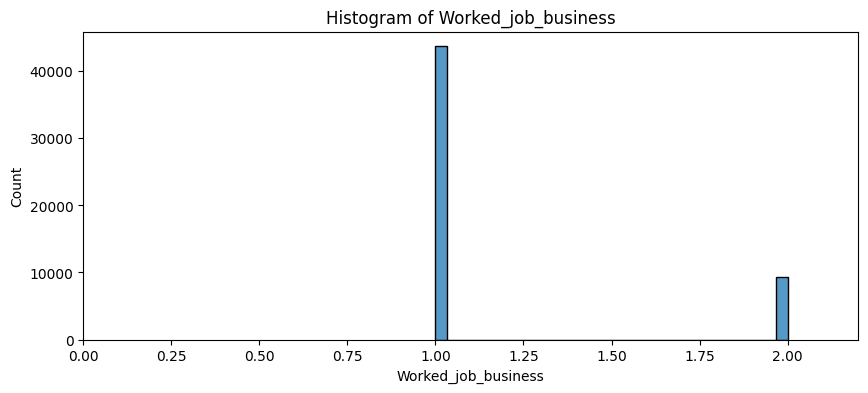

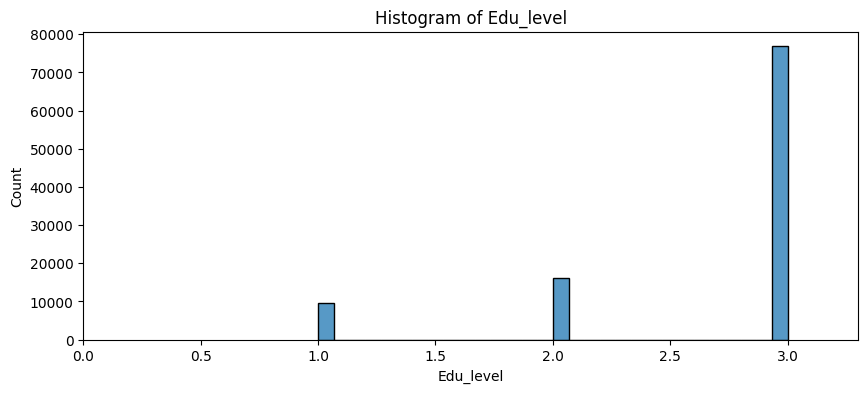

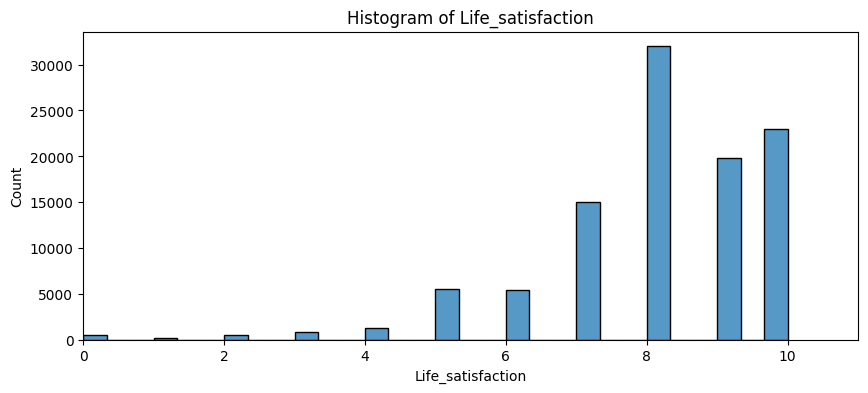

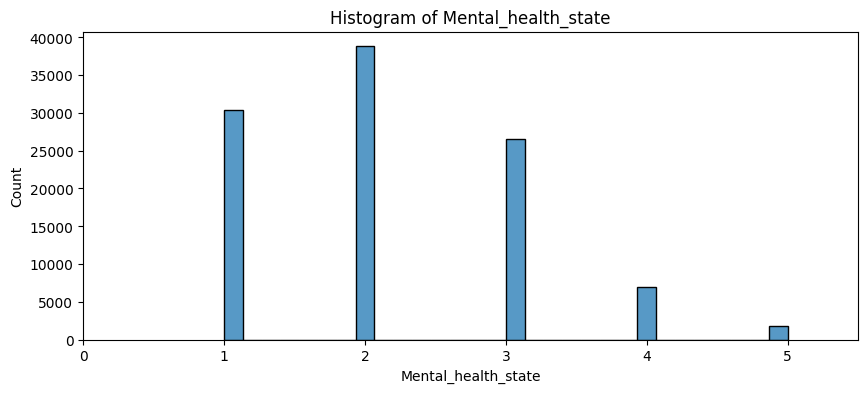

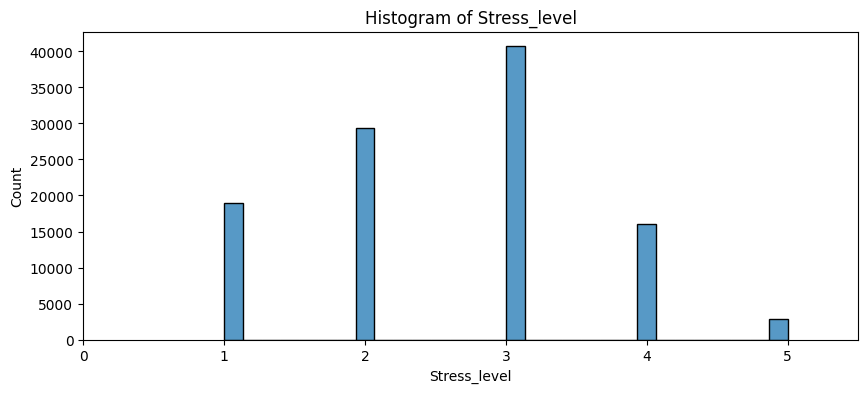

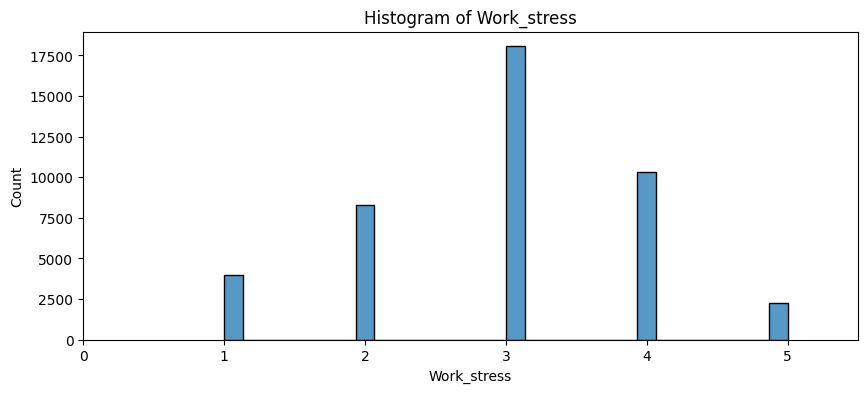

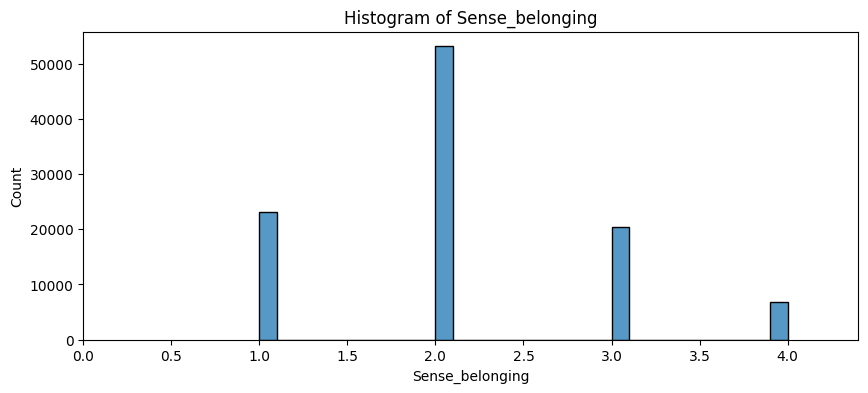

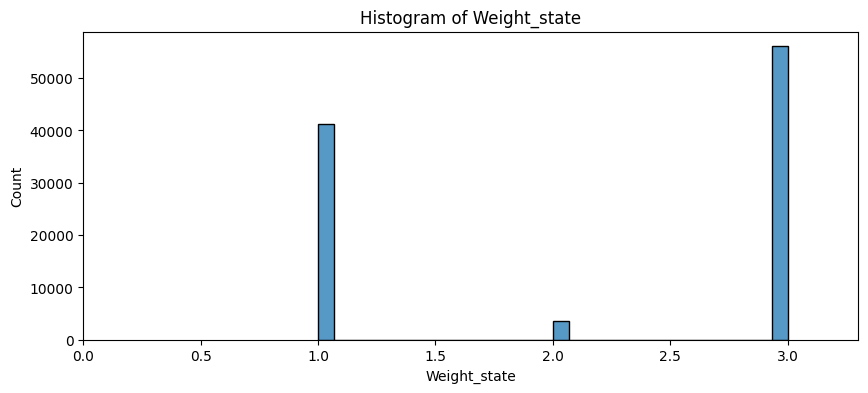

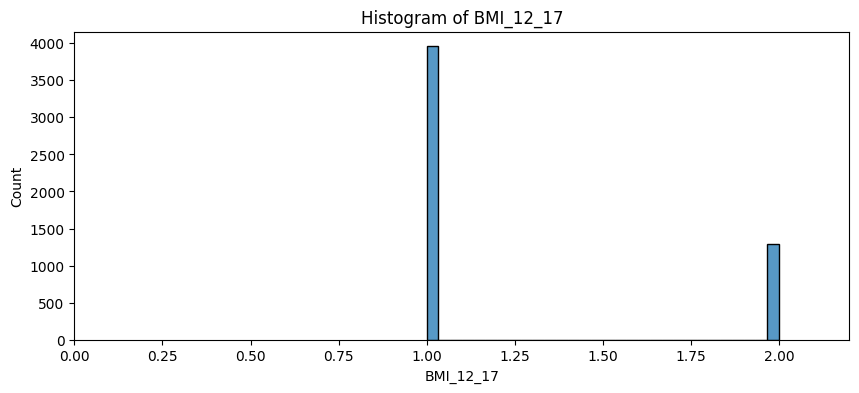

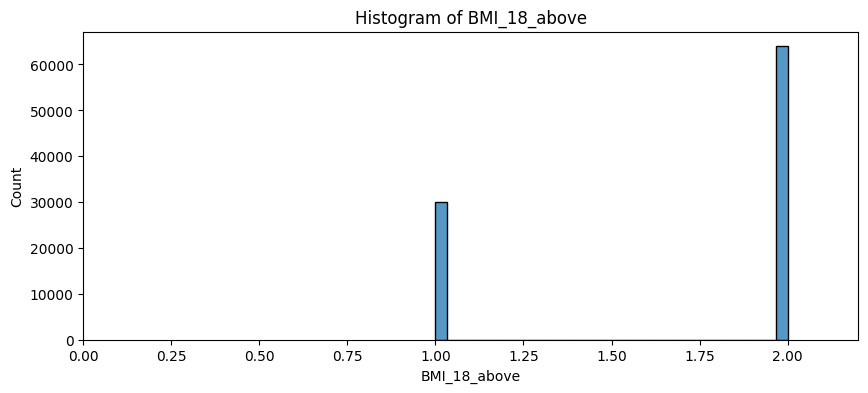

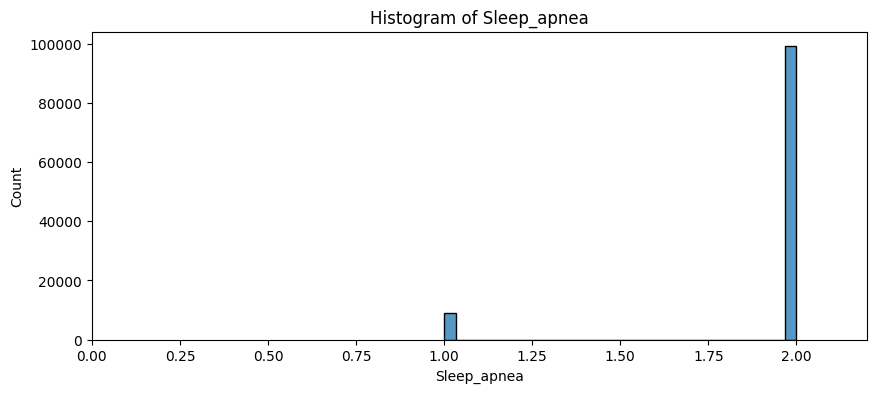

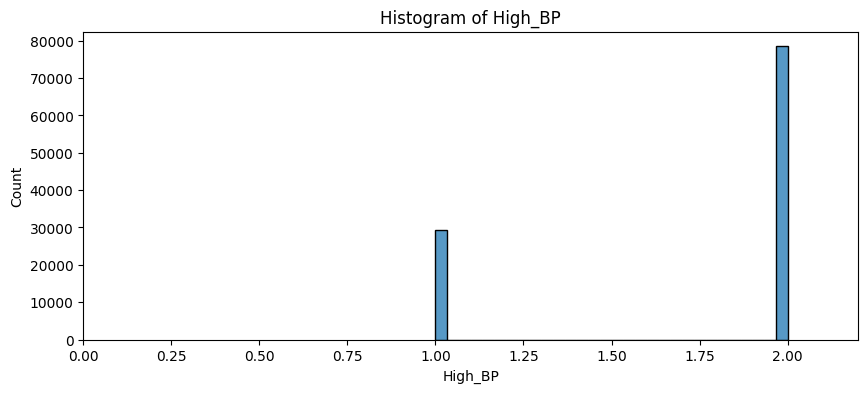

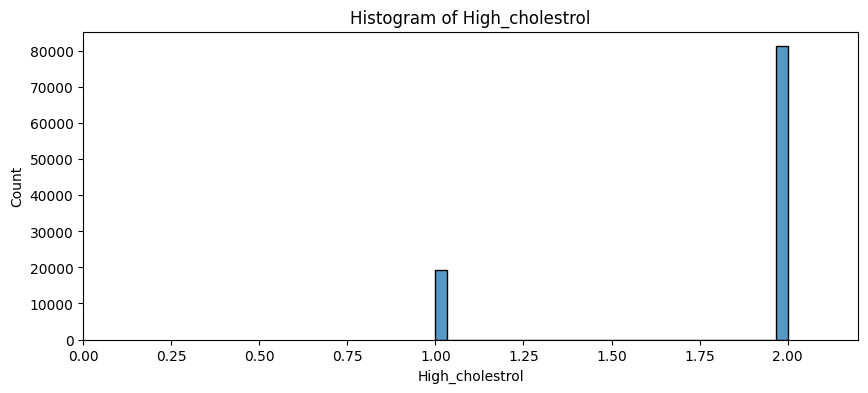

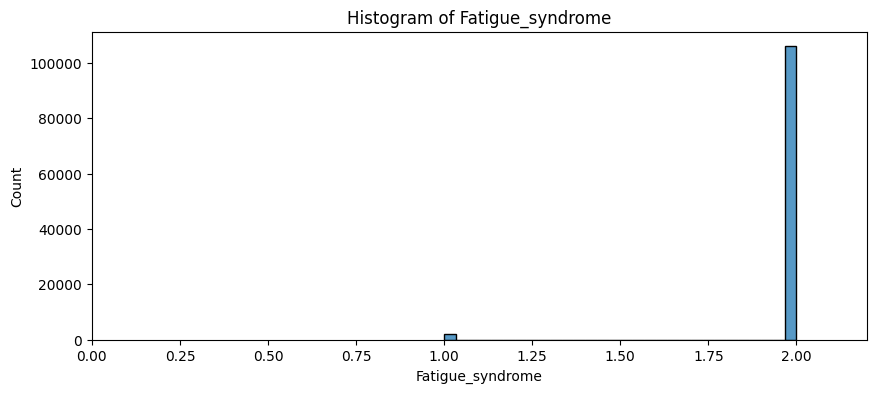

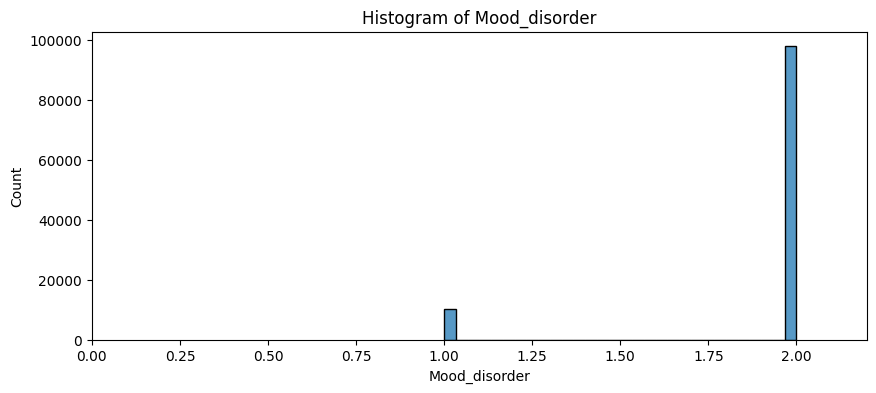

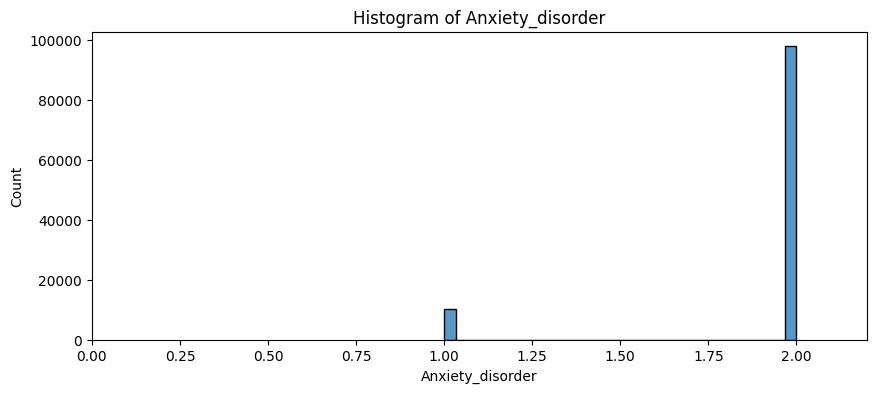

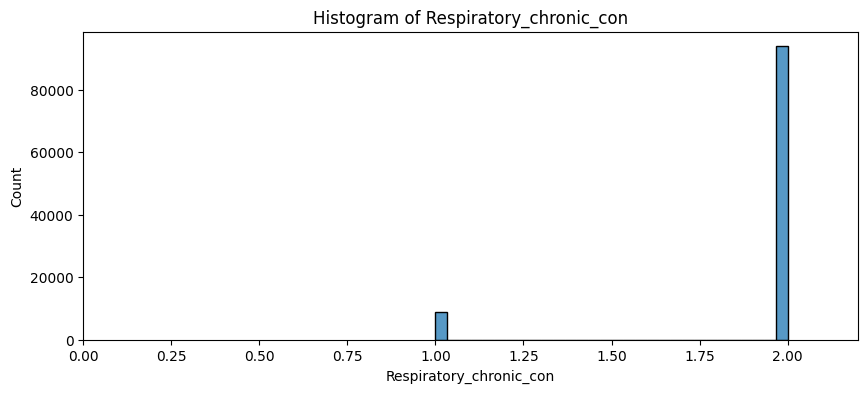

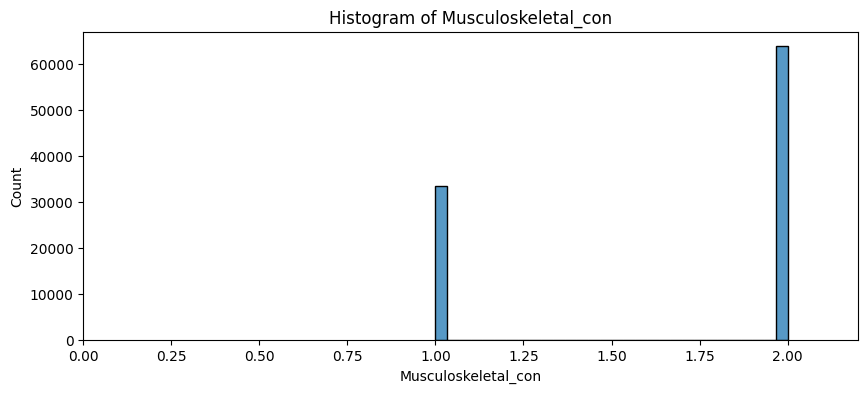

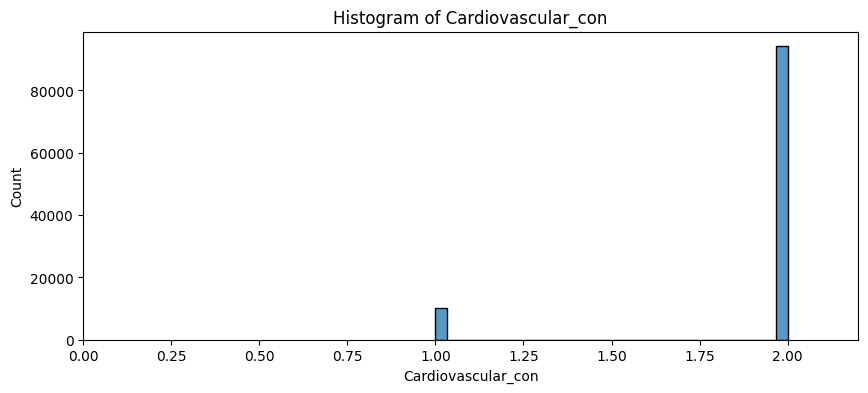

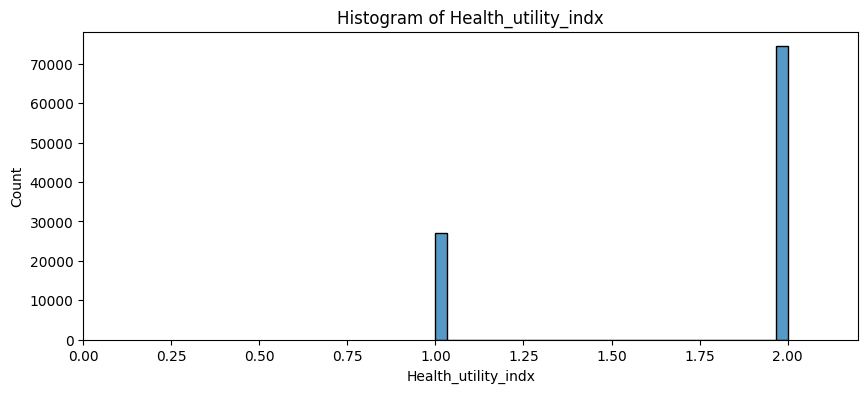

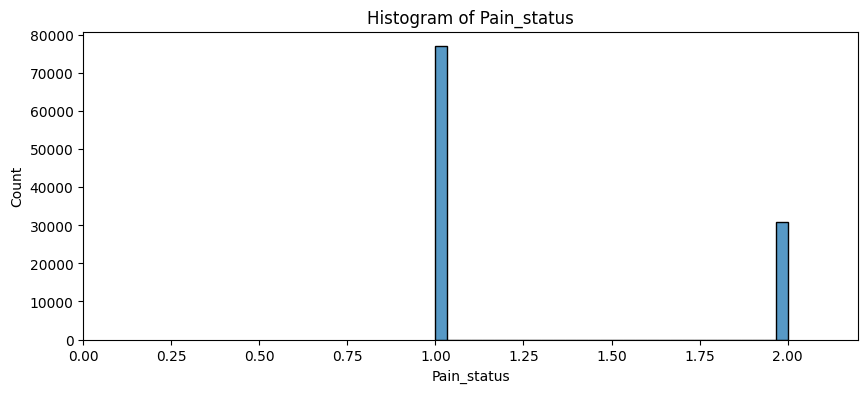

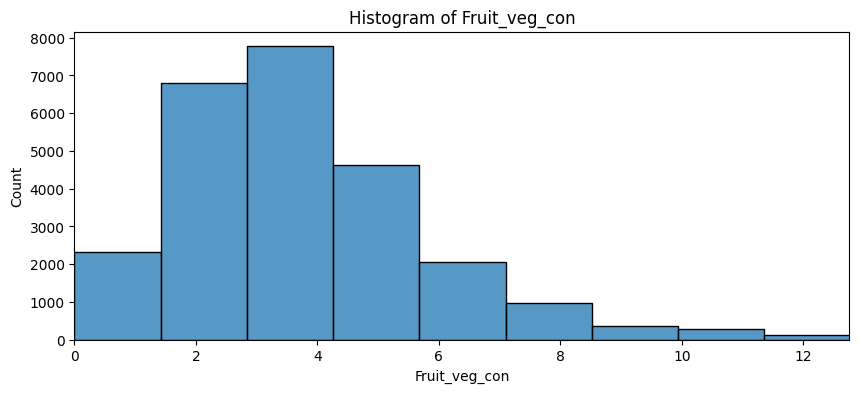

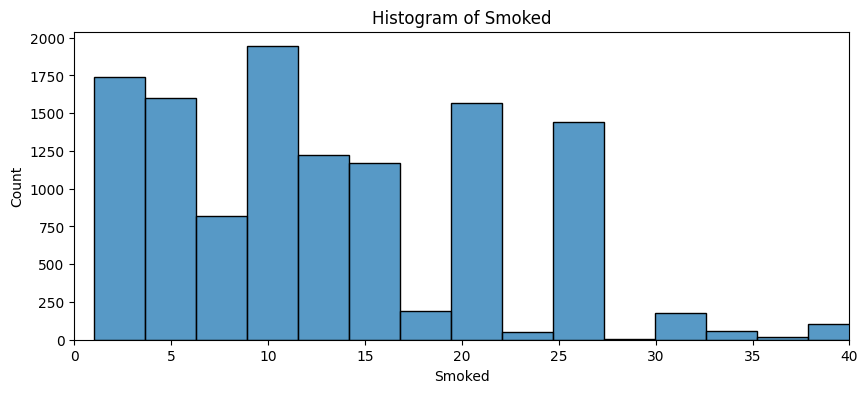

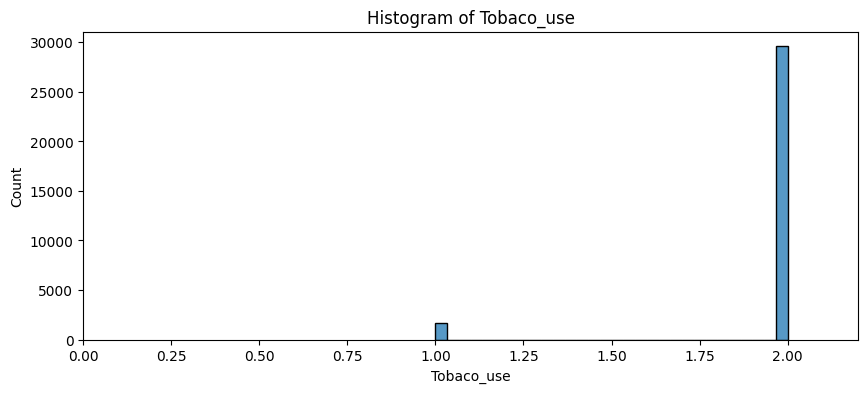

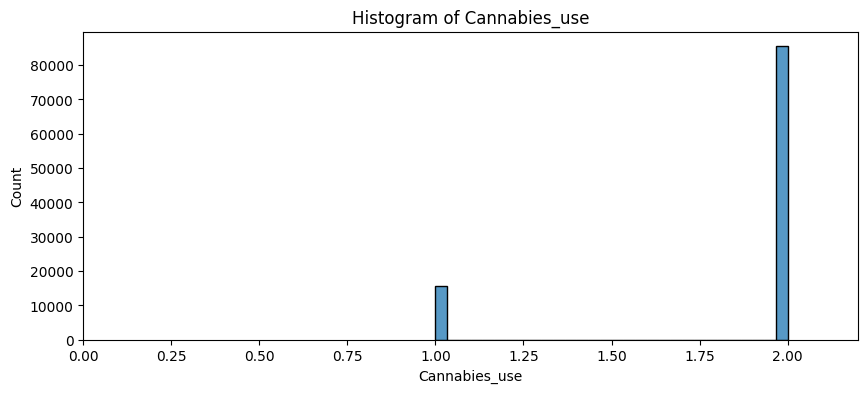

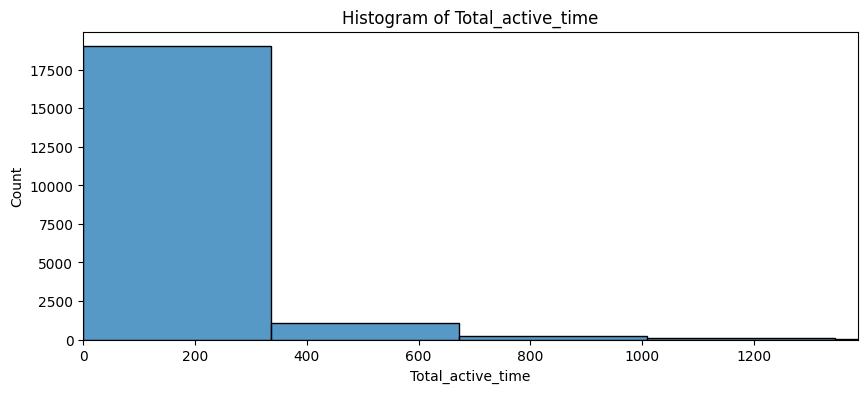

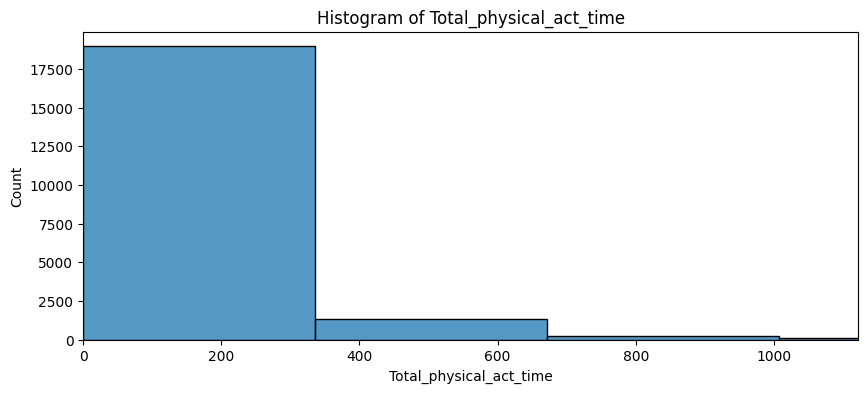

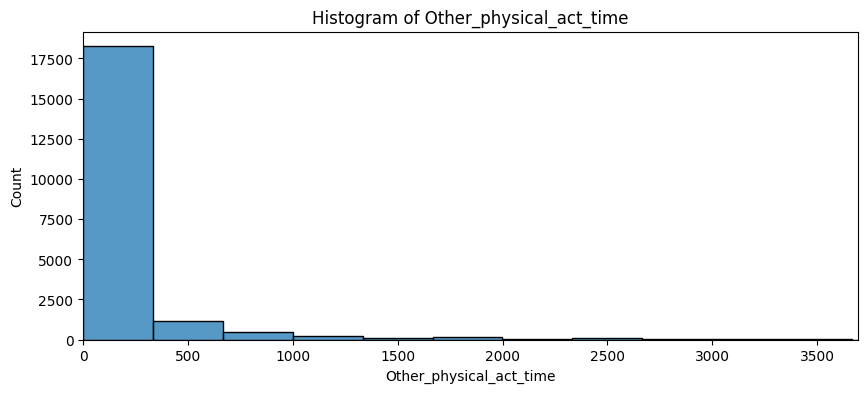

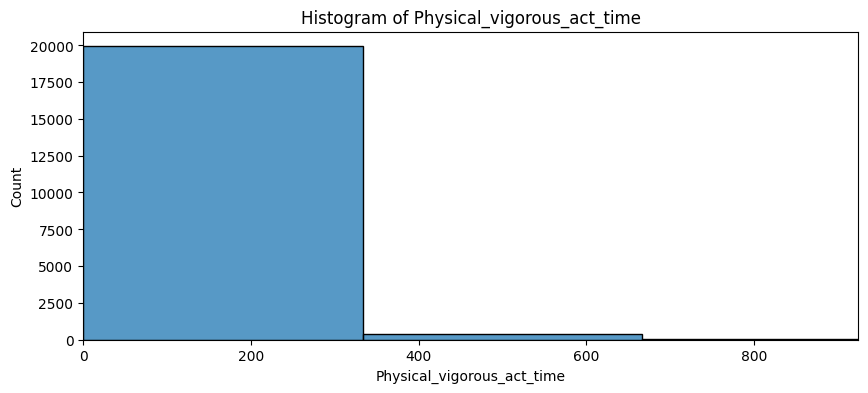

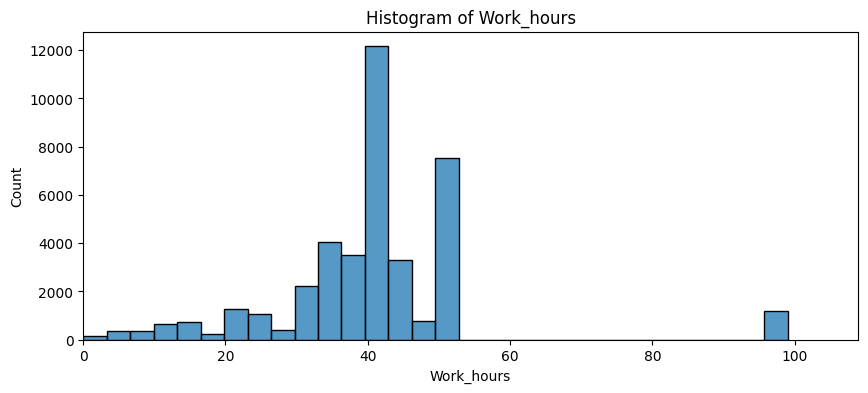

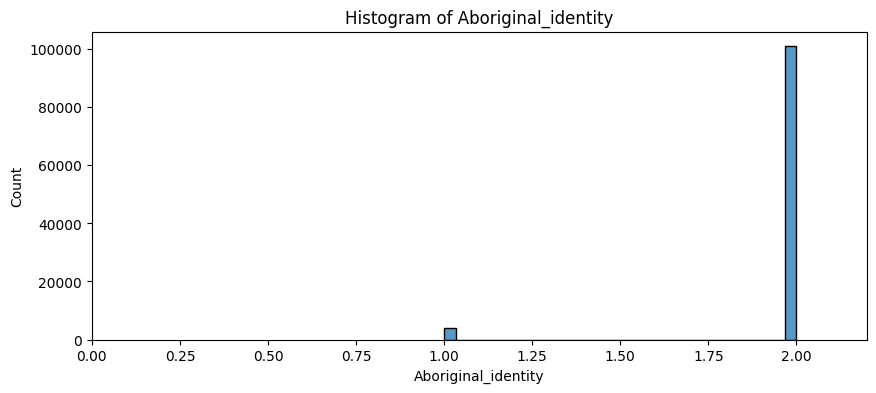

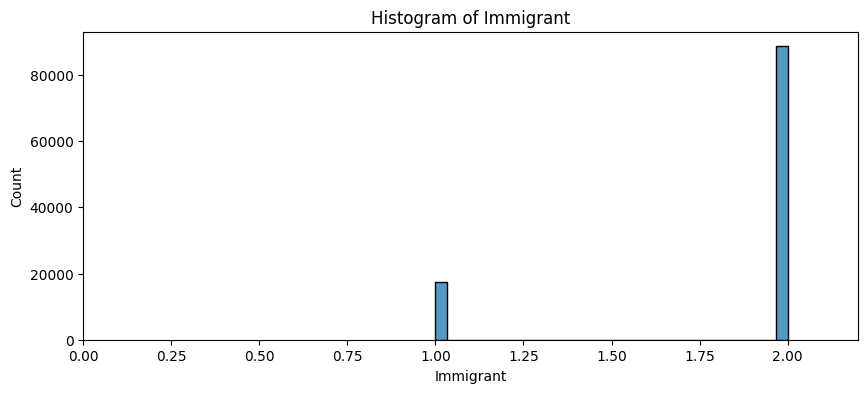

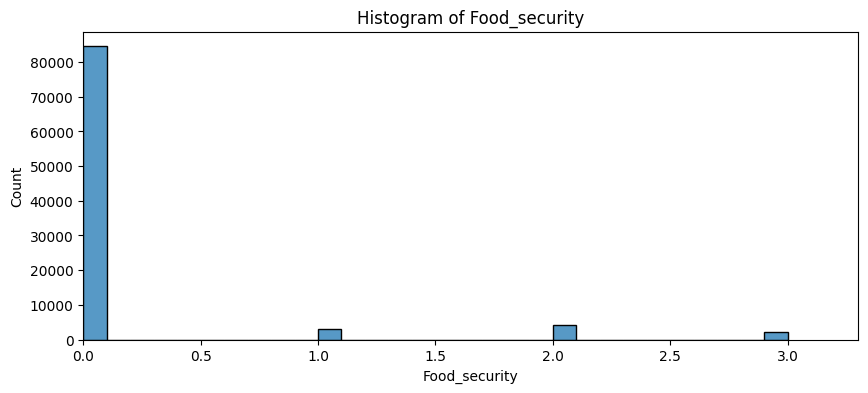

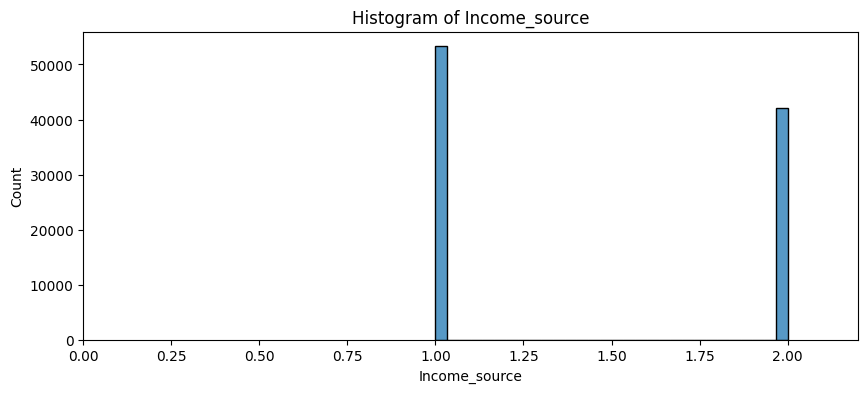

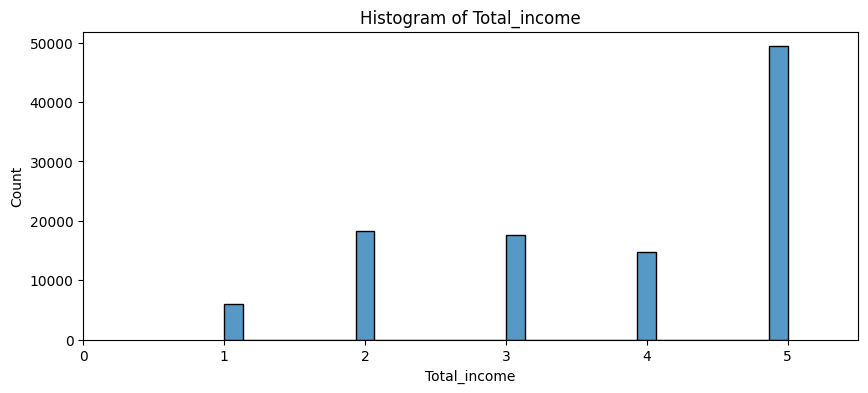

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = df.select_dtypes(include='number').columns.tolist()

chunk_size = 10
for i in range(0, len(numeric_cols), chunk_size):
    cols_chunk = numeric_cols[i:i+chunk_size]
    for col in cols_chunk:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col].dropna(), bins=30, kde=False)

        if col == 'weekly_alcohol':
            plt.xlim(0, 40)
        elif col == 'Smoked':
            plt.xlim(0, 40)
        else:
            q99 = np.percentile(df[col].dropna(), 99)
            plt.xlim(0, q99 * 1.1)

        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


In [8]:
cols_to_keep = [
    "Life_satisfaction",
    "Gen_health_state",
    "Mental_health_state",
    "Sense_belonging",
    "Edu_level",
    "weekly_alcohol",
    "Total_physical_act_time",
    "Fruit_veg_con",
    "Income_source",
    "Work_stress"
]

filtered_df = df[cols_to_keep]
filtered_df = filtered_df[filtered_df["Life_satisfaction"].between(0, 10, inclusive="both")]
filtered_df.to_csv("filtered_life_satisfaction.csv", index=False)


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

correlations = df.corr(numeric_only=True)['Life_satisfaction'].drop('Life_satisfaction').sort_values(key=abs, ascending=False)
print("Correlation with Life_satisfaction (numeric):")
print(correlations)

print("\nGroup means for categorical variables:")
categorical_cols = df.select_dtypes(include='category').columns.tolist()
for col in categorical_cols:
    if df[col].nunique() < 15:
        means = df.groupby(col)['Life_satisfaction'].mean().sort_values(ascending=False)
        print(f"\n{col}:\n{means}")

X = df.dropna(subset=['Life_satisfaction']).copy()
y = X.pop('Life_satisfaction')
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))
X = X.fillna(-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 15 Feature Importances:")
print(importances.head(15))


Correlation with Life_satisfaction (numeric):
Mental_health_state          -0.503442
Stress_level                 -0.340705
Health_utility_indx           0.336526
Sense_belonging              -0.277518
Mood_disorder                 0.267297
Pain_status                  -0.234160
Food_security                -0.220017
Anxiety_disorder              0.212729
Marital_status               -0.176107
Total_income                  0.171102
Work_stress                  -0.158354
Household                     0.151311
Fatigue_syndrome              0.144287
Worked_job_business          -0.137198
Smoked                       -0.130539
Weight_state                  0.118085
Cannabies_use                 0.118012
Musculoskeletal_con           0.108003
Fruit_veg_con                 0.099059
Sleep_apnea                   0.093104
Respiratory_chronic_con       0.085121
Edu_level                     0.084435
High_BP                       0.076965
Cardiovascular_con            0.071803
High_cholestrol   